In [1]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
from statsmodels.datasets import get_rdataset
from theano import tensor as tt

In [4]:
blue, *_ = sns.color_palette()
SEED = 5132290 #from random.org
np.random.seed(SEED)
N = 20
K = 30
alpha = 2.
P0 = sp.stats.norm


In [5]:
#Draw samples from the stick breaking process
beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:,0] = beta[:,0]
w[:,1:] = beta[:,1:] * (1 - beta[:, :-1]).cumprod(axis=1)
omega = P0.rvs(size=(N,K))
x_plot = np.linspace(-3, 3, 200)
sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

In [25]:
beta.shape, w.shape, sample_cdfs.shape, omega.shape,np.less.outer(omega, x_plot).sum(axis=1).shape

((20, 30), (20, 30), (20, 200), (20, 30))

In [40]:
beta.cumprod(axis=1).shape, sample_cdfs[1:].T.shape

((20, 30), (200, 19))

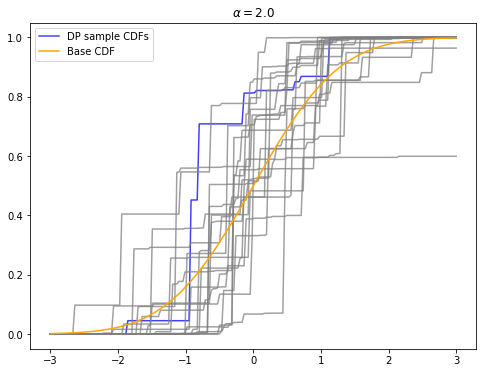

In [11]:
#Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_plot, sample_cdfs[0], c='blue', alpha=0.75, label='DP sample CDFs')
ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75)
ax.plot(x_plot, P0.cdf(x_plot), c='orange', label='Base CDF')
ax.set_title(r'$\alpha={}$'.format(alpha))
ax.legend(loc=2)

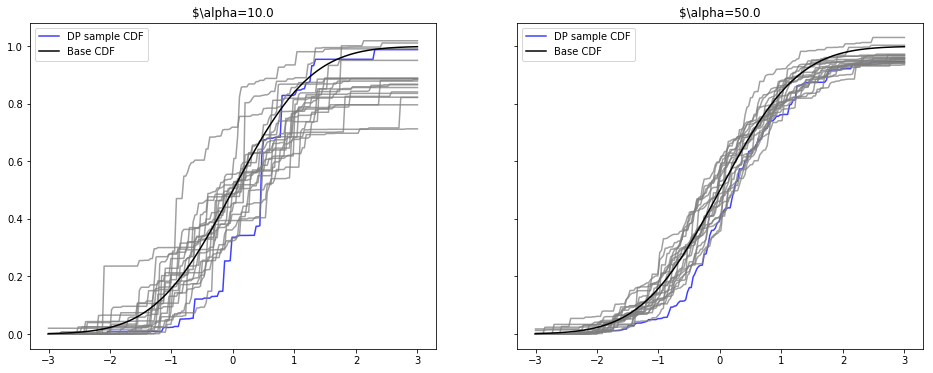

In [44]:
def create_data(alpha, K, x_plot):
    beta = sp.stats.beta.rvs(1, alpha, size=(N,K))
    w = np.empty_like(beta)
    w[:, 0] = beta[:, 0]
    w[:, 1:] = beta[:, 1:] * (1 - beta[:, 1:]).cumprod(axis=1)
    omega = P0.rvs(size=(N,K))
    sample_cdfs=(w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)
    return sample_cdfs, P0

fig, (l_ax, r_ax) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(16,6))
sample_cdfs, P0 = create_data(alpha=10.,K=50, x_plot=x_plot)
l_ax.plot(x_plot, sample_cdfs[0], color='blue', alpha=0.75, label='DP sample CDF')
l_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75)
l_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF')
l_ax.set_title(r'$\alpha={}'.format(10.))
l_ax.legend(loc=2)

sample_cdfs, P0 = create_data(alpha=50.,K=200, x_plot=x_plot)
r_ax.plot(x_plot, sample_cdfs[0], color='blue', alpha=0.75, label='DP sample CDF')
r_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75)
r_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF')
r_ax.set_title(r'$\alpha={}'.format(50.))
r_ax.legend(loc=2)

